In [2]:
import numpy as np
import pandas as pd

In [3]:
data_df = pd.read_csv('./auto_mpg.csv', header = 0)

In [4]:
print('데이터셋 크기:', data_df.shape)
data_df.head()

데이터셋 크기: (398, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [7]:
data_df = data_df.drop(['car_name','origin','horsepower'], axis=1, inplace=False)
data_df.head()

,mpg,cylinders,displacement,weight,acceleration,model_year
0,18.0,8,307.0,3504,12.0,70
1,15.0,8,350.0,3693,11.5,70
2,18.0,8,318.0,3436,11.0,70
3,16.0,8,304.0,3433,12.0,70
4,17.0,8,302.0,3449,10.5,70


In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
Y = data_df['mpg']
X = data_df.drop(['mpg'], axis=1 , inplace = False)

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3 , random_state= 0)

In [11]:
print(X_train)

     cylinders  displacement  weight  acceleration  model_year
230          8         350.0    4165          11.4          77
357          4         119.0    2615          14.8          81
140          8         304.0    4257          15.5          74
22           4         104.0    2375          17.5          70
250          8         318.0    3735          13.2          78
..         ...           ...     ...           ...         ...
323          4         156.0    2800          14.4          80
192          6         250.0    3353          14.5          76
117          4          68.0    1867          19.5          73
47           6         250.0    3282          15.0          71
172          4          90.0    2223          16.5          75

[278 rows x 5 columns]


In [12]:
lr = LinearRegression()

In [14]:
lr.fit(X_train, Y_train)

LinearRegression()

In [16]:
Y_predict = lr.predict(X_test)

In [17]:
mse = mean_squared_error(Y_test, Y_predict)
rmse = np.sqrt(mse)
print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('R^2(Variance score) : {0:.3f}'.format(r2_score(Y_test, Y_predict)))

MSE : 12.278, RMSE : 3.504
R^2(Variance score) : 0.808


In [18]:
print('Y 절편 값: ', np.round(lr.intercept_, 2))
print('회귀 계수 값: ', np.round(lr.coef_, 2))

Y 절편 값:  -17.55
회귀 계수 값:  [-0.14  0.01 -0.01  0.2   0.76]


In [19]:
coef = pd.Series(data = np.round(lr.coef_, 2), index = X.columns)
coef.sort_values(ascending = False)

model_year      0.76
acceleration    0.20
displacement    0.01
weight         -0.01
cylinders      -0.14
dtype: float64

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

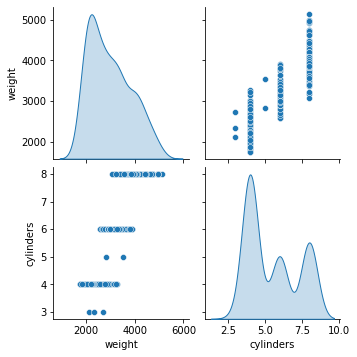

In [39]:
sns.pairplot(X_train[['weight', 'cylinders']],diag_kind="kde")

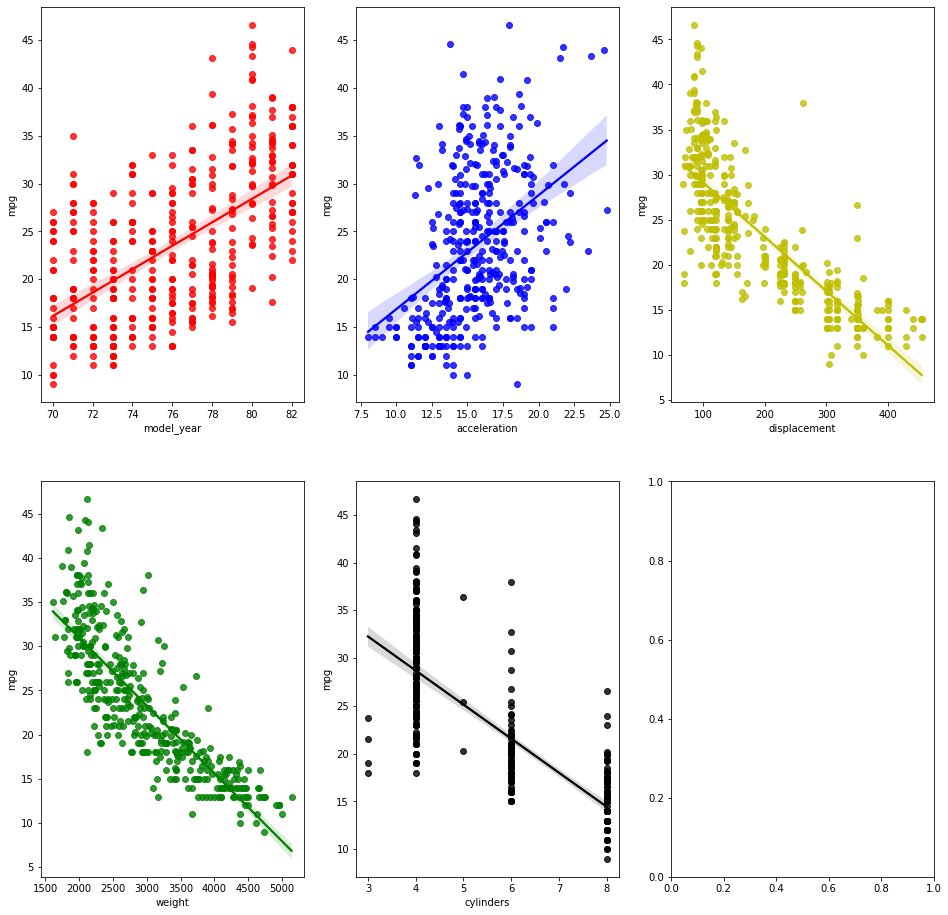

In [40]:
fig, axs = plt.subplots(figsize = (16,16), ncols = 3, nrows = 2)
x_features = ['model_year', 'acceleration', 'displacement', 'weight', 'cylinders']
plot_color = ['r', 'b', 'y', 'g', 'k']
for i, feature in enumerate(x_features):
    row = int(i/3)
    col = i%3
    sns.regplot(x = feature, y = 'mpg', data = data_df, ax = axs[row][col], color = plot_color[i])

In [41]:
print("연비를 예측하고 싶은 차의 정보를 입력해주세요.")
cylinders_1 = int(input("cylinders : "))
displacement_1 = int(input("displacement : "))
weight_1 = int(input("weight : "))
acceleration_1 = int(input("acceleration : "))
model_year_1 = int(input("model_year : "))

연비를 예측하고 싶은 차의 정보를 입력해주세요.
cylinders : 8
displacement : 350
weight : 3200
acceleration : 22
model_year : 99


In [43]:
mpg_predict = lr.predict([[cylinders_1, displacement_1, weight_1, acceleration_1 , model_year_1]])

In [44]:
print("이 자동차의 예상 연비(MPG)는 %.2f입니다." %mpg_predict)

이 자동차의 예상 연비(MPG)는 41.32입니다.
